# SymPy example - mass transfer in a cellular construct

![Schematic](img/construct.jpg)

The problem is to solve the following equation

\begin{equation}
\frac{\partial \mathrm{c}}{\partial \mathrm{t}}=\mathrm{D} \frac{\partial^{2} \mathrm{c}}{\partial \mathrm{x}^{2}}-\mathrm{V}_{\mathrm{max}, \mathrm{cell}} \rho_{\mathrm{cell}}
\end{equation}

For a steady state solution, we can neglect the left hand side term, so the equation will be

\begin{equation}
\mathrm{D} \frac{\partial^{2} \mathrm{c}}{\partial \mathrm{x}^{2}}-\mathrm{V}_{\mathrm{max}, \mathrm{cell}} \rho_{\mathrm{cell}} = 0
\end{equation}

We want to know the maximum depth of oxygen penetration. 

## Solving the equation

It is a 1-D problem, so let's say $c = c(x)$ and rewrite the equation as

\begin{equation}
D \frac{d^{2} c}{d x^{2}} = V_m \rho \rightarrow \frac{d^{2} c}{d x^{2}} = \frac{V_m \rho}{D}
\end{equation}

Integrating both sides of the equation yields:

\begin{equation}
\int \frac{d^{2} c}{d x^{2}} d x=\int \frac{V_m \rho}{D} d x
\end{equation}

\begin{equation}
\rightarrow \frac{d c}{d x} = \frac{V_m \rho}{D}  x + C_1
\end{equation}

We can simply use the second boundary condition to get the value of $C_1$. We know $\frac{d c}{d x} = 0$ at $x = d$, so:

\begin{equation}
0 = \frac{V_m \rho}{D}  d + C_1 \rightarrow C_1 = - \frac{V_m \rho d}{D}
\end{equation}

We still have a derivative term in the equation, so we integrate it again to eliminate that term:

\begin{equation}
\int \frac{d c}{d x} d x = \int \left(\frac{V_m \rho}{D}  x + C_1 \right) d x
\end{equation}

\begin{equation}
\rightarrow c(x) = \frac{V_m \rho}{D} \frac{x^2}{2} + C_1 x + C_2
\end{equation}

We already know the value of $C_1$, and by using the first boundary condition, we can obtain the value of $C_2$ as well. According to the first boundary condition, $c(x) = c_0$ at $x = 0$, so:

\begin{equation}
C_2 = c_0
\end{equation}

Now, by knowing the value of $C_1$ and $C_2$ and having no remained derivitive in the equation, we can write the equation of the change of concentration of oxygen throughout the construct:

\begin{equation}
c(x) = \frac{V_m \rho}{D} \frac{x^2}{2} - \frac{V_m \rho d}{D} x + c_0 \rightarrow c(x) = \frac{V_m \rho}{D} \left( \frac{x^2}{2} - x d \right) + c_0
\end{equation}

It's the time to calculate the maximum depth of diffusion. It can be simply calculated by finding the value of $x$ at which the concentration of oxygen is zero. Let's denote it by $d_{max}$ (we can say the value of $d$ equals $d_{max}$ as well), and solve the derived equation:

\begin{equation}
x = d_{max}, c(x) = 0 \rightarrow 0 = \frac{V_m \rho}{D} \left( \frac{{d_{max}}^2}{2} - {d_{max}}^2 \right) + c_0
\end{equation}

\begin{equation}
\rightarrow d_{\max }=\sqrt{2 c_{0} \frac{D}{V_m \rho}}
\end{equation}

## Solve with Sympy

In [1]:
from sympy import init_session
init_session(quiet=True)

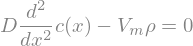

In [2]:
x, D, V, rho = symbols("x, D, V_m, rho", positive=True)
c = Function("c") 
ode = D * c(x).diff(x, 2) - V * rho
Eq(ode, 0)

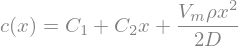

In [3]:
ode_sol = dsolve(ode)
ode_sol

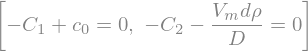

In [4]:
c0, d = symbols("c_0, d", positive=True)
ics = {c(0): c0, c(x).diff(x).subs(x, d): 0}
parameters = ode_sol.free_symbols - set([D, V, rho, x])
eq1 = (ode_sol.lhs - ode_sol.rhs).subs(x, 0).subs(ics)
eq2 = (ode_sol.lhs - ode_sol.rhs).diff(x).subs(x, d).subs(ics)
eqs = [eq1, eq2]
[Eq(eq1, 0), Eq(eq2, 0)]

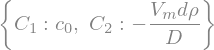

In [5]:
sol_params = solve(eqs, parameters)
sol_params

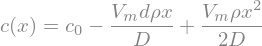

In [6]:
cx_sol = ode_sol.subs(sol_params)
cx_sol

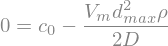

In [7]:
d_max = symbols("d_max", positive=True)
d_eq = cx_sol.subs(c(x), 0).subs(x, d_max).subs(d, d_max)
d_eq

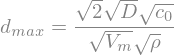

In [8]:
ans = solve(d_eq, d_max)[0]
Eq(d_max, ans)